# Chapter 5 - Support Vector Machine

This notebook contains the code for chapter 5. 

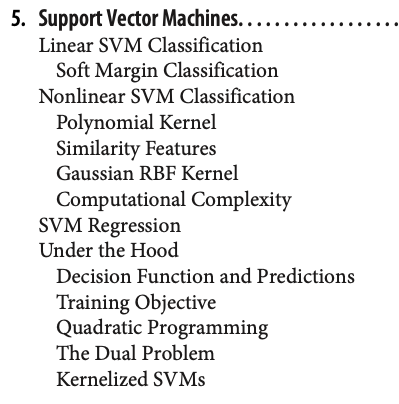
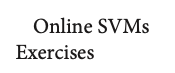

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

*Support Vector Machine (SVM)*: 
* Linear and non linear classification
* Regression
* Outlier detection

Works well for classification of complex small or medium sized databases

## 5.1 Linear SVM classification

*Linearly separable*: two classes that can be separated easily by a straight line

Example: three decision boundaries of three different linear classifiers


In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

Saving figure large_margin_classification_plot


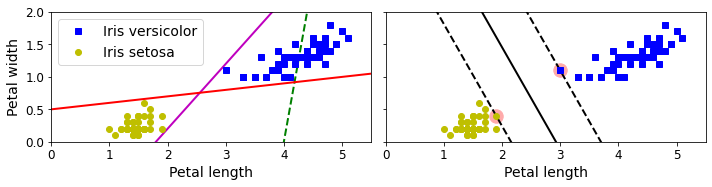

In [3]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

Left image
* Green dashed: bad model, doesn't separate classes properly
* Pink, red
    * Work perfectly on the training set
    * Decision boundary very close to the instances
    * Probably not perform well on new instances
    
Right image
* Solid line: decision boundary of an **SVM clasifier**
    * Separate the two classes
    * Stay as far away as possible from the closest training instances
    * Fitting the widest possible street (dashed lines) between the classes
    * Adding more training instaces off the street: no influence on decision boundary
    * Decision boundary determined (or 'supported') by instances located at the edge of the street (*support vectors*)
    
**Note:** SVM are sensitive to feature scale. If scale is similar: wider street. 

Saving figure sensitivity_to_feature_scales_plot


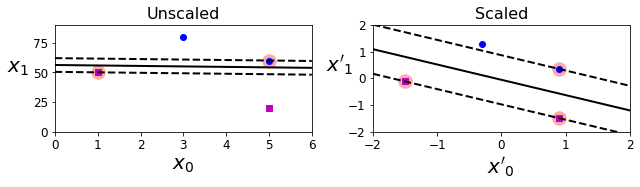

In [4]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")

### 5.1.1 Soft Margin Classification

*Hard margin classification*
* Strictly impose that all instances must be on the street and on the right hand side
* Only works with linearly separable data
* Sensitive to outliers (i.e. one additional outlier can make it impossible to find a hard margin)

Saving figure sensitivity_to_outliers_plot


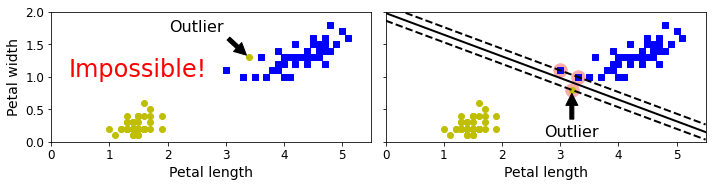

In [5]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

*Soft margin classification*
* More flexible model
* Finding a good balance between keeping the street as large as possible and limiting *margin violation* (i.e. instances in the middle of the street or on the wrong side)

Regularisation hyperparameter `C` effect
* C low: large margin violations
* C high: fewer margin violations

Low margin violation is better, but check which one fits the model better. 

If model is **overfitting**: regularise it by reducing `C`. 

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Load iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

# Scale features and train a linear model with C=1 and hinge loss function
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [8]:
# Generate graph to compare different regularisation settings
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/Users/arzuffi/Documents/ML/hands-on_ML/ho_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [9]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure regularization_plot


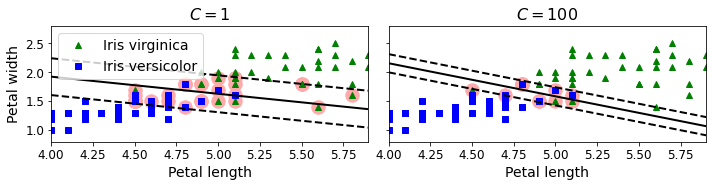

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

In [11]:
# Make predictions
svm_clf.predict([[5.5, 1.7]])

array([1.])

SVM classifiers do not output probabilities for each class. 

Classifiers: 
* `LinearSVC` class
* `SVC` class with a linear kernel: `SVC(kernel='linear', C=1)`
* Stochastic Gradient Descent ot train a linear SVM classifier (for out-of-core training): `SGDClassifier(loss='hinge', alpha=1/(m*C))`

Notes: 
* `LinearSVC` class regularises the bias term
    * Center the training set first by subtracting the mean
    * Automatic if scaling with `StandardScaler`
* Set `loss='hinge'`
* For better performance set `dual=False` unless there are more features than training instances

## 5.2 Nonlinear SVM Classification

Handle nonlinear dataset to obtain linearly separable dataset: 
* Add more features (i.e. polynomial features)

Example: adding $x_2 = (x_1)^2$

Saving figure higher_dimensions_plot


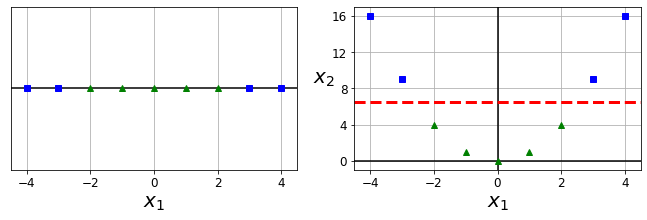

In [12]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

Test implementation on moons dataset: toy dataset for binary classification in which the data points are shaped as two interleaving half circles. 

Generate dataset using the `make_moons()` function. 

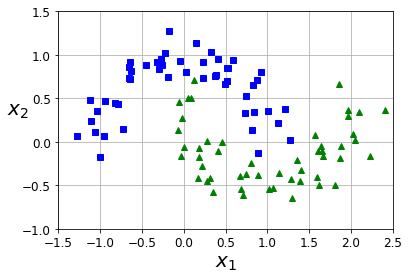

In [13]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [14]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Define pipeline
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

# Fit
polynomial_svm_clf.fit(X, y)

/Users/arzuffi/Documents/ML/hands-on_ML/ho_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

Saving figure moons_polynomial_svc_plot


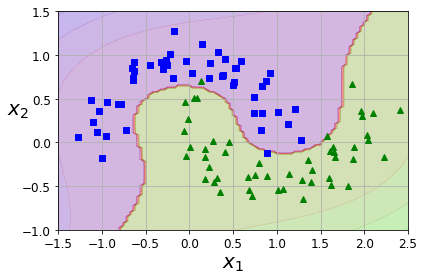

In [15]:
# Plot predictions
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

### 5.2.1 Polynomial Kernel 

Adding polynomial features
* Low polynomial degree: cannot deal with very complex datasets 
* High polynomial degree: create a huge number of features, making the model slow
    * Use the *kernel trick*: same results without adding features, even with high degree polynomial
        * `kernel='poly'`
        * `coef0` controls how much of the model is influenced by high-degree polynomials versus low-degree polynomials
    
Example:

In [16]:
from sklearn.svm import SVC

# Define classifier
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()), 
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

# Fit
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [17]:
# Increase the degree of the polynomial
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Saving figure moons_kernelized_polynomial_svc_plot


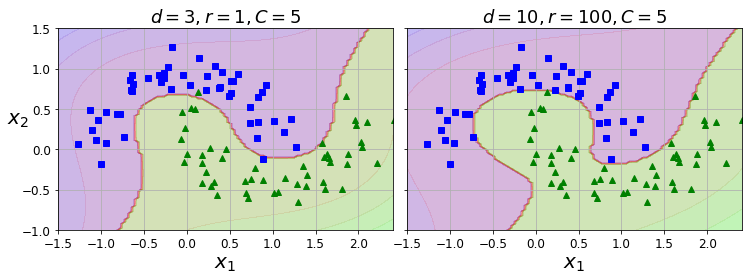

In [18]:
# Plot 
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

Polynomial degree
* Reduce if overfitting
* Increase if underfitting

Find the right hyperparameters
* Coarse grid search
* Finer grid search around the best values found
* Having a good sense of what each hyperparameter actually does can also help you search in the right part of the hyperparameter space

### 5.2.2 Similarity Features

Add features computed using a *similarity function*, which measure how much each instance resembles a particular *landmark*. 

Example: 
* Add two landmarks 
    * $x_1=-2$
    * $x_1=1$
* Define similarity function: Gaussian *Radial Basis Function* (RBF)
    * $y=0.3$
    * Bell shaped function varying from 0 (far from landmark) to 1 (at the landmark)

$\phi_y(\boldsymbol{x}, l) = exp(-y\parallel \boldsymbol{x}-l \parallel^{2})$

Instance $x=-1$
* Distance 1 from the first landmark and 2 from the second $\parallel \boldsymbol{x}-l\parallel$
* New features
    * $x_2 = exp(-0.3 \times 1^2)\approx0.74$
    * $x_3 = exp(-0.3 \times 2^2)\approx0.30$

Saving figure kernel_method_plot


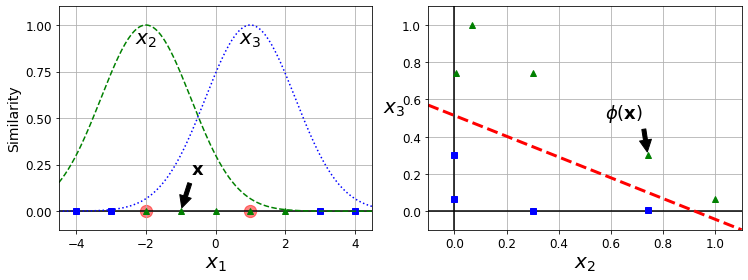

In [19]:
# Plot function
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()

Transformed dataset on the right (dropping the original features) is linearly separable.

**How to select the landmarks**: create a landmark at the location of each and every instance of the dataset. 
* Creates many dimensions and increase the chance that the transformed training set will be linearly separable
* Training set with $m$ instances and $n$ features will have $m$ instances and $m$ features (after dropping original features)
* If training set very large, this greatly increase the number of features

### 5.2.3 Gaussian RBF Kernel

Adding similarity features can be computationally expensive
* Use `kernel='rbf` to obtain the same result without adding features

Example

In [21]:
# Creating RBF pipeline
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()), 
    ("svm_clf", SVC(kernel='rbf', gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Saving figure moons_rbf_svc_plot


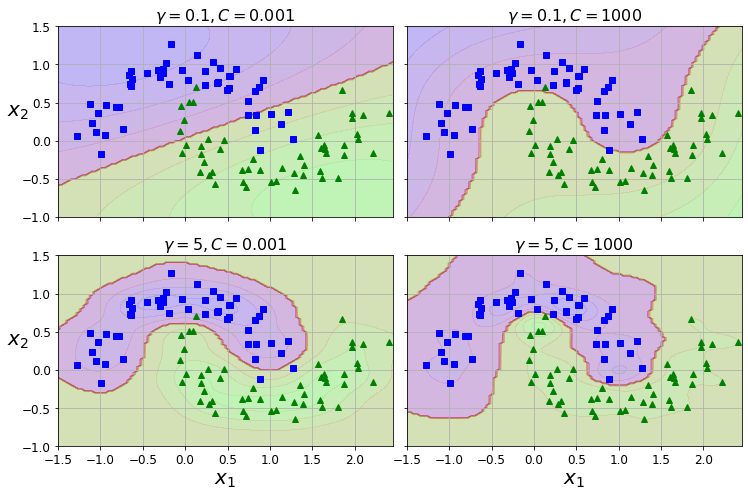

In [22]:
# Plot (with different hyperparameters)
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()

Modyfing hyperparameters `gamma` $\gamma$ and `C`

Increasing `gamma`: 
* Narrower bell shape curve
* Each instance's range of influence is smaller
* Irregular decision boundary that wriggles around single instances

Small `gamma`: 
* Wider bell shaped curve
* Instances have a larger range of influence
* Smooth decision boundary 

`Gamma` acts like a regularisation hyperparameter (similar to `C`): 
* Reduce if overfitting
* Increase if underfitting 

Other kernels, specialised for specific data structures: 
* Text documents or DNA sequence classification: *String kernels*
    * *String subsequence kernel*
    * Kernels based on *Levenshtein distance*
    
Which kernel to use?
* Linear kernel first (`LinearSVC` faster than `SVC(kernel="linear")`
* Gaussian RBF kernel if training set is not too large 
* Experiment on other kernels using cross-validation and grid search


### 5.2.4 Computational Complexity 

`LinearSVC`
* Based on `liblinear` library
* Implements [optimised algorithm](https://www.csie.ntu.edu.tw/~cjlin/papers/cddual.pdf) for linear SVM
* Does not support the kernel trick
* Scales linearly with the number of training instances and the number of features
* Training complexity $O(m\times{n})$
* Longer time if higer precision required
    * Precision controlled by tolerance hyperparameter $\epsilon$ `tol`
    * Default parameter ok in most classification tasks

`SVC`
* Based on `libsvm` library
* Implemented [algorithm](https://www.microsoft.com/en-us/research/publication/sequential-minimal-optimization-a-fast-algorithm-for-training-support-vector-machines/)
* Supports the kernel trick
* Training time complexity between $O(m^2\times{n})$ and $O(m^3\times{n})$
* Slow when the number of training instances gets large
* Perfect for small or medium sized training sets
* Scales well with the number of features expecially with *sparse features* (when each instance has few nonzero features). In this case, the algorithm scales roughly with the average number of nonzero features per instance. 

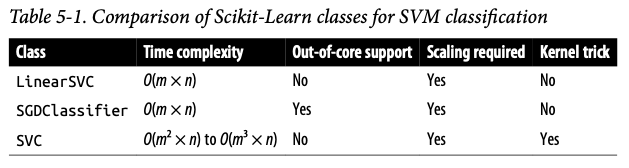

## 5.3 SVM Regression

SVM also supports linear and non linear regression. 

Reverting the objective: fit as many instances as possible *on* the street while limiting margin violations (i.e. instances *off* the street). 

The width of the street is controlled by the hyperparameter $\epsilon$. 

**Linear regression**: `LinearSVR`

Example (training data scaled and centered)

In [23]:
# Get data
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [24]:
# Define classifier
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [25]:
# Define other classifier with different hyperparameters
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])


Saving figure svm_regression_plot


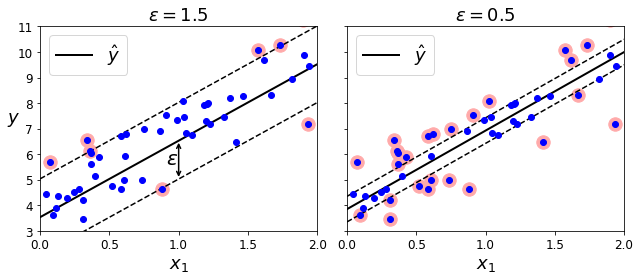

In [26]:
# Plot data
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()

$\epsilon$-insensitive model: adding more training instances within the margin does not affect the model’s predictions. 

**Non linear regression**: kernelised SVM model `SVR` with kernel trick. 

Example: SVM regression on a random quadratic training set, using a second degree polynomial kernel
* Large `C` value: little regularisation
* Small `C` value: more regularisation

In [27]:
# Get data
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [28]:
# Define classifier
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [29]:
# Other classifier with different hyperparameters
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

Saving figure svm_with_polynomial_kernel_plot


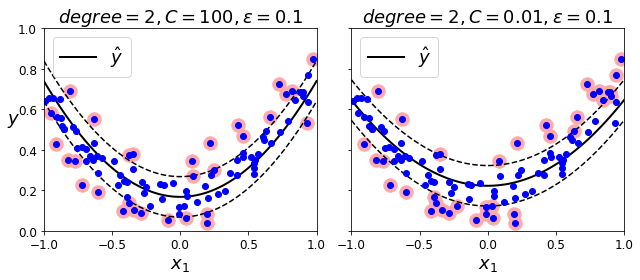

In [30]:
# Plot data
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
save_fig("svm_with_polynomial_kernel_plot")
plt.show()

* `SVR` is the regression equivalent of `SVC` 
    * Slow with large training set
* `LinearSVR` is regression equivalent of `SVCLinear` 
    * Scale linearly with the size of the training set
    
SVM can be used for *outlier detection*. 

## 5.4 Under the Hood

Convention: 
* Bias term: $b$
* Feature weight vector: $\boldsymbol{w}$
* No bias term added to the input features vector

### 5.4.1 Decision Function and Predictions

Linear SVM classifier model predicts the class of a new instance $\boldsymbol{x}$ by computing the decision function: 

$\boldsymbol{w}^T\boldsymbol{x}+b = w_1x_1+...+w_nb_n+b$

Predicted class $\hat{y}$
* Positive class (1) if possitive result
* Negative class (0) if negative result

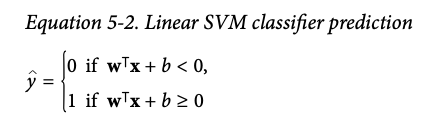

In [31]:
# Get data
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

Saving figure iris_3D_plot


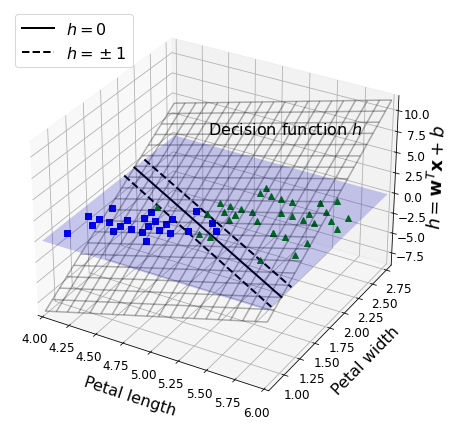

In [32]:
# Plot data
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=16)
    ax.set_xlabel(r"Petal length", fontsize=16, labelpad=10)
    ax.set_ylabel(r"Petal width", fontsize=16, labelpad=10)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=5)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

save_fig("iris_3D_plot")
plt.show()

For $n$ features: 
* Decision function: $n$-dimensional *hyperplane*
* Decision boundary: $(n-1)$-dimensional hyperplane

For 2 features: 
* Decision function: 2D plane
* Decision boundary
    * Set of points where the decision function = 0
    * Intersection of two planes: straight line (solid line in the graph)
    * Dashed lines: points where the decision function is equal to 1 or -1
        * Parallel
        * Equal distance to the decision boundary 
        * Form a margin around the decision boundary 

Training a linear SVM classifier: 
* Finding the values of $\boldsymbol{w}$ and $b$ that make the margin as wide as possible
* Avoiding margin violations (hard margin)
* Limiting margin violations (soft margin)

### 5.4.2 Training Objective

Slope of the decision function

Saving figure small_w_large_margin_plot


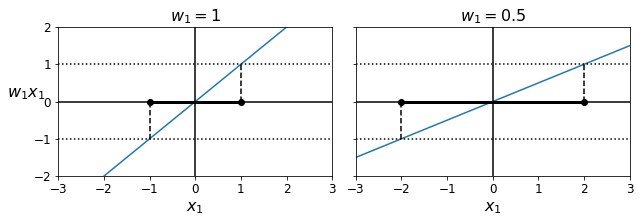

In [33]:
# Plot data
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
save_fig("small_w_large_margin_plot")
plt.show()

Slope of the decision function: norm of the weight vector $\parallel\boldsymbol{w}\parallel$
* Divide by 2
* The points where the decision function is equal $\pm$ 1, are twice as far away from the decision boundary
* Dividing the slope by two, will multiply the margin by 2

The smaller the weight vector $\boldsymbol{w}$, the larger the margin. 

Objective: 
* Minimise $\parallel\boldsymbol{w}\parallel$ to get a larger margin
* For hard margin (avoid any margin violation), decision function
    * Greater than 1 for all positive training instances
        * $y^{(i)} = 0$
        * $t^{(i)} = -1$
    * Lower than -1 for negative training instances
        * $y^{(i)} = 1$
        * $t^{(i)} = 1$

   * Constraint for all instances: $t^{(i)}(\boldsymbol{w}^{T}\boldsymbol{x}^{(i)} + b) \geq 1$

*Hard margin linear SVM classifier objective*

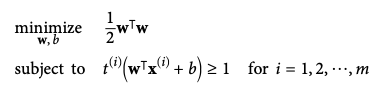

Optimisation algorithms work better on differentiable functions
* Minimise $\frac{1}{2}\boldsymbol{w}^{T}\boldsymbol{w}$ 
* Equal to $\frac{1}{2}\parallel \boldsymbol{w} \parallel ^{2}$ 
* $\frac{1}{2}\parallel \boldsymbol{w} \parallel ^{2}$ has derivative $\boldsymbol{w}$
* $\parallel \boldsymbol{w} \parallel$ not differentiable at $\boldsymbol{w} = 0$

*Soft margin linear SVM classifier objective*

Introduce *slack variable* $\zeta \geq 0$: measure how much the $i^{th}$ instance is allowed to violate the margin

Two conflicting objectives:
* Make the slack variable as small as possible to reduce the margin violation
* Make $\frac{1}{2}\boldsymbol{w}^{T}\boldsymbol{w}$ as small as possible to increase the margin

Hyperparameter `C` defines the tradeoff between the two objectives. 

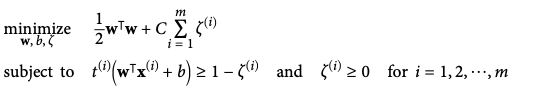

### 5.4.3 Quadratic Programming

*Quadratic Programming* (QP) problems: convex quadratic optimisation problems with linear constraint
* Hard margin
* Soft margin

Solver available for these kind of problems. 

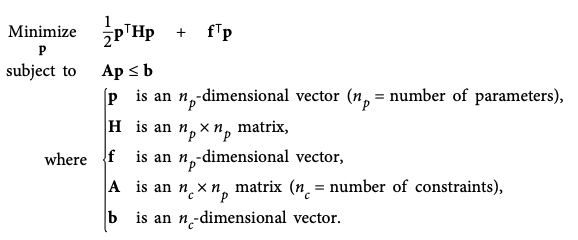

$ \boldsymbol{A} \boldsymbol{p} \leq \boldsymbol{b}$ defines $n_c$ constraints: $\boldsymbol{p}^{T}\boldsymbol{a}^{(i)} \leq b^{(i)}$ for $i = 1, 2, ..., n_c$
* $\boldsymbol{a}^{(i)}$ is the vector containing the elements of the $i^{th}$ row of $\boldsymbol{A}$
* $b^{(i)}$ is the $i^{th}$ element of $\boldsymbol{b}$


Set the QP parameters to get the hard margin linear SVM classifier objective:
* $n_p = n+1$, where $n$ is the number of features (+1 for the bias term)
* $n_c = m$, where $m$ is the number of training instances
* $\boldsymbol{H}$ is the $n_p \times n_p$ identity matrix, except with a zero in the top-left cell (to ignore the bias term)
* $\boldsymbol{f}=0$, an $n_p$-dimensional vector full of 0s
* $\boldsymbol{b}=-1$, an $n_c$-dimensional vector full of -1s
* $\boldsymbol{a}^{(i)} = -t^{(i)}\boldsymbol{x}^{(i)}$, where $\boldsymbol{x}^{(i)}$ is equal to $\boldsymbol{x}^{(i)}$ with an extra bias feature $\boldsymbol{x}_0 = 1$

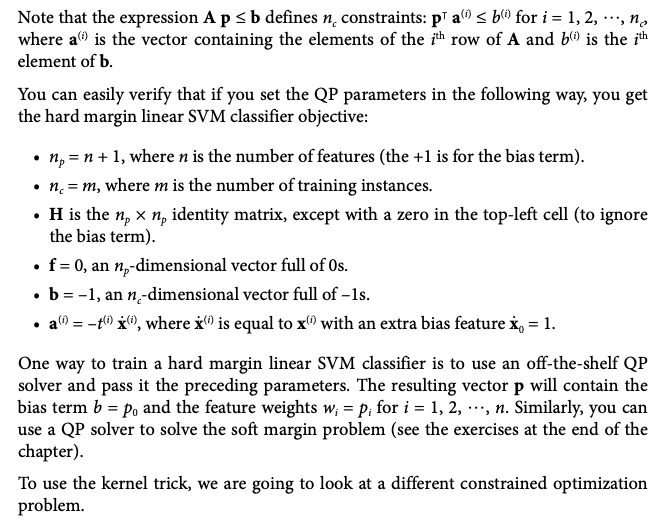